<a href="https://colab.research.google.com/github/YooSungSoo/2023S-Ajou-ML/blob/main/HW2_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW2

이번 과제에서는 대출의 승인 여부(Status)를 예측하는 데이터셋을 사용합니다.
<br>
HW1에서 제공한 데이터셋과는 다른 데이터셋입니다. bb에 업로드된 train.csv를 사용하여 과제를 진행해주세요.

[원본 데이터셋 링크](https://www.kaggle.com/datasets/mirzahasnine/loan-data-set?select=loan_train.csv)

## 주의
✋ 작성한 모든 코드에 주석을 작성할 것
<br>
✋ 이번 과제에서는 보고서 제출 X, 다만 문제 풀이 파일을 제출해야 함!

## 코랩 연결 및 라이브러리 불러오기

In [362]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [363]:
pwd!

'/content/drive/My Drive/Colab Notebooks'

In [364]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 불러오기

In [366]:
df = pd.read_csv('./train2.csv') # 제공된 train.csv 사용 # 환경에 맞게 path 조절 가능

In [367]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,Male,No,0,Graduate,No,584900,0.0,15000000,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,458300,150800.0,12800000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,300000,0.0,6600000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,258300,235800.0,12000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,600000,0.0,14100000,360.0,1.0,Urban,Y


In [368]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
609,Female,No,0,Graduate,No,290000,0.0,7100000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,410600,0.0,4000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,807200,24000.0,25300000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,758300,0.0,18700000,360.0,1.0,Urban,Y
613,Female,No,0,Graduate,Yes,458300,0.0,13300000,360.0,0.0,Semiurban,N


In [369]:
df.describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History
count,6.140000e+02,6.140000e+02,6.140000e+02,600.00000,564.000000
mean,5.403459e+05,1.621246e+05,1.414104e+07,342.00000,0.842199
std,6.109042e+05,2.926248e+05,8.815682e+06,65.12041,0.364878
min,1.500000e+04,0.000000e+00,0.000000e+00,12.00000,0.000000
25%,2.877500e+05,0.000000e+00,9.800000e+06,360.00000,1.000000
50%,3.812500e+05,1.188500e+05,1.250000e+07,360.00000,1.000000
75%,5.795000e+05,2.297250e+05,1.647500e+07,360.00000,1.000000
max,8.100000e+06,4.166700e+06,7.000000e+07,480.00000,1.000000


In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              601 non-null    object 
 1   Married             611 non-null    object 
 2   Dependents          599 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       582 non-null    object 
 5   Applicant_Income    614 non-null    int64  
 6   Coapplicant_Income  614 non-null    float64
 7   Loan_Amount         614 non-null    int64  
 8   Term                600 non-null    float64
 9   Credit_History      564 non-null    float64
 10  Area                614 non-null    object 
 11  Status              614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


## 간단한 EDA

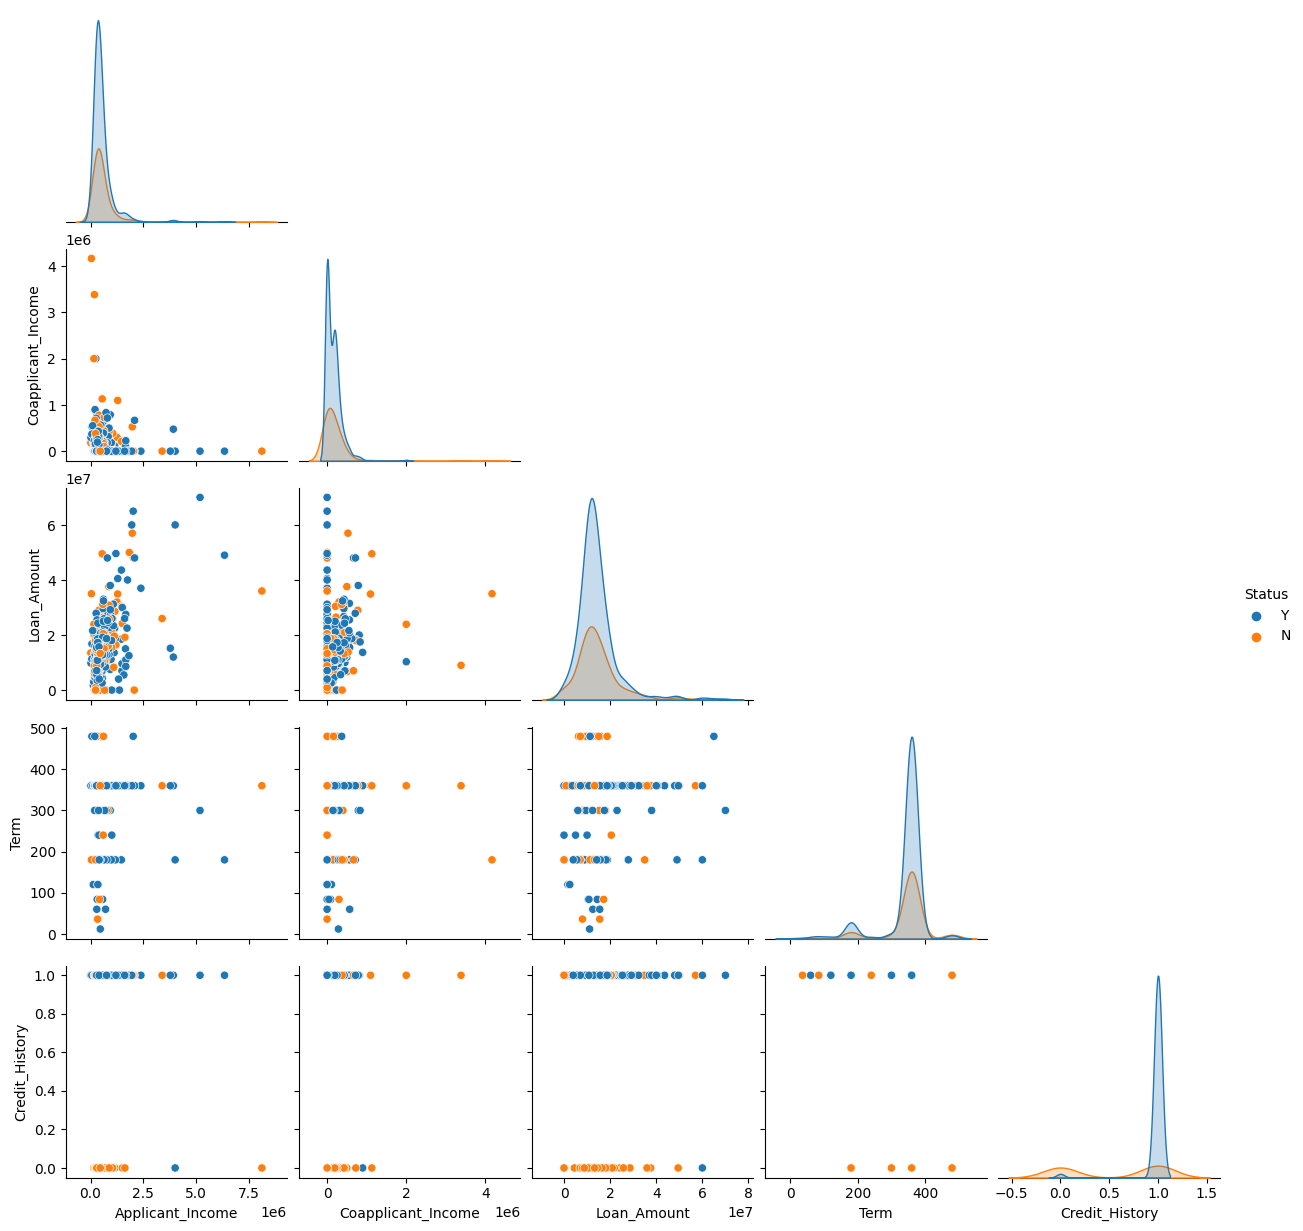

In [371]:
sns.pairplot(df,corner=True,hue='Status') # 이 데이터의 타겟 변수(예측하고자 하는 변수)는 'Status'입니다

<Axes: >

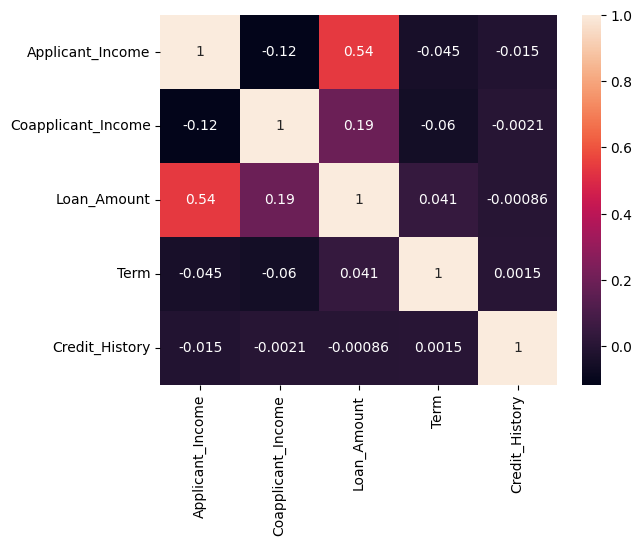

In [372]:
sns.heatmap(df.corr(),annot=True) # numerical feature들끼리의 correlation

## 결측치 확인

In [373]:
df.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount            0
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

## 문제1: Categorical feature missing value drop
categorical feature에서 결측값이 있는 row를 삭제하세요.  


*   'Credit_History'열에 있는 결측값도 함께 제거합니다.

참고) sklearn 패키지에서 제공하는 imputer를 사용하면 최빈값으로 categorical feature의 결측 값도 채울 수 있으나, 편의 상 결측값이 있는 행을 삭제하겠습니다.




In [374]:
## 문제 1 ##
# 코드 작성
categorical = list(df.select_dtypes(include='object').columns) # categorical features들의 column name 모음
categorical.append("Credit_History") # Credit_History도 categorical column이므로 리스트에 추가해줌
df = df.dropna(axis=0,subset=categorical) # axis=0 row에 대해서 categorical column들에 대해서 결측치가 있다면 drop 
df.info() # 결측치가 이제 없는 것을 확인할 수 있다.
##########

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              511 non-null    object 
 1   Married             511 non-null    object 
 2   Dependents          511 non-null    object 
 3   Education           511 non-null    object 
 4   Self_Employed       511 non-null    object 
 5   Applicant_Income    511 non-null    int64  
 6   Coapplicant_Income  511 non-null    float64
 7   Loan_Amount         511 non-null    int64  
 8   Term                499 non-null    float64
 9   Credit_History      511 non-null    float64
 10  Area                511 non-null    object 
 11  Status              511 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 51.9+ KB


## 문제2: Label Encoding
모든 categorical feature들을 Label Encoding하여 numerical feature로 바꾸세요.
* LabelEncoder()를 사용하세요

In [375]:
from sklearn.preprocessing import LabelEncoder

In [376]:
categorical = list(df.select_dtypes(include='object').columns) # categorical features들의 column name 모음

In [377]:
## 문제 2 ##
# 코드 작성
enc = LabelEncoder()
for col in categorical:
    df[col] = enc.fit_transform(df[col])
##########

<ipython-input-377-3e534ec7a7d7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = enc.fit_transform(df[col])
<ipython-input-377-3e534ec7a7d7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = enc.fit_transform(df[col])
<ipython-input-377-3e534ec7a7d7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [378]:
df # categorical -> numerical 로 바뀌었는지 확인

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,1,0,0,0,0,584900,0.0,15000000,360.0,1.0,2,1
1,1,1,1,0,0,458300,150800.0,12800000,360.0,1.0,0,0
2,1,1,0,0,1,300000,0.0,6600000,360.0,1.0,2,1
3,1,1,0,1,0,258300,235800.0,12000000,360.0,1.0,2,1
4,1,0,0,0,0,600000,0.0,14100000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,290000,0.0,7100000,360.0,1.0,0,1
610,1,1,3,0,0,410600,0.0,4000000,180.0,1.0,0,1
611,1,1,1,0,0,807200,24000.0,25300000,360.0,1.0,2,1
612,1,1,2,0,0,758300,0.0,18700000,360.0,1.0,2,1


## 문제 3: KNN imputer
위에서 이 데이터셋의 numberical feature에도 결측치가 있음을 확인했습니다.   
categorical feature에서는 결측치가 있는 행을 drop하였지만 numerical feature 중 결측치가 있는 'Term'열에 대해서 KNN imputer를 사용하여 결측치를 채워봅시다.


* categorical feature와 imputer를 적용하려고 하는 feature(term)를 제외하고, 나머지 numerical feature에 대해서 normalization을 수행한 다음 imputation을 진행해주세요. (imputation을 할 때에만 normalized된 feature들을 사용합니다)
* **주의)** 'Credit_History'는 categorical feature로 간주하여야 합니다.
* term의 결측치를 채울 때에는 'normalized_df'를 사용하고 원본 데이터프레임의 'term' 열만 knn imputer로 결측치를 채운 'term'열로 변경합니다.
* 문제3번 이후 문제에서는 term의 결측치를 채운 변경된 df를 이용합니다.



### 문제 3-1
주어진 코드틀에 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하는 코드를 작성하세요.  
* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.
* 참고) 거리를 구할 때 데이터에 null 값이 있으면 거리가 nan으로 계산이 됩니다. 따라서 null인 데이터가 있는 행을 제외하고 거리를 계산하거나 모든 거리를 계산하고 nan 을 가진 데이터는 k개를 고를 때 제외해주시면 됩니다.

### 문제 3-2
주어진 코드틀에서 k개의 값을 보고 평균을 내어 결측값을 결정하는 코드를 작성하세요.
* 주의) 코드틀 이외의 부분에 코드를 작성하지 마세요!
* 주의) 코드 시작과 코드 끝 라인을 삭제하지 마세요.

In [379]:
import tqdm
from sklearn.preprocessing import StandardScaler

In [380]:
class Knn_imputer():
    def __init__(self, n_neighbors): 
        
        ## 생성자로 최근접 이웃수(n_neighbors)를 입력 받습니다.
        self.k = n_neighbors    
  
    ## knn 은 lazy learning 입니다.
    def fit(self,X):
        self.X = X
  
    def predict(self, X, feat_name): # feat_name: KNN imputer를 사용하려는 feature 명

        for i in tqdm.tqdm(range(len(X))):
            if pd.isnull(X[feat_name].iloc[i]): # feat_name 열에 있는 결측값 확인

                distance = self.dist(X, X.iloc[i], feat_name) # 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하는 함수
                
                
                sorted_dist = sorted(distance.items(), key=lambda x: x[1]) # distance 를 sorting 하기

                ################  문제 3-2  ####################
                # k개의 "feat_name" 값을 보고 평균 내어 값을 결정하기
                # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
                # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
                ################ 코드 시작  #####################

                value = 0

                for iter in range(self.k):
                    index = sorted_dist[iter+1][0] # 자기 자신과의 거리인 0번째 원소는 제외 즉, 1,2,3 이런식으로
                    value += X[feat_name].iloc[int(index)]
                X[feat_name].iloc[i] = value / self.k # k개의 원소 값을 참조하고 평균 내주는 것으로 결측치를 처리함

                ################ 코드 끝  ######################
                ##############################################
        

    def dist(self, X, y, feat_name): # feat_name: KNN imputer를 사용하려는 feature 명
        num_train = X.shape[0]
        X = X.drop([feat_name], axis=1)
        y = y.drop([feat_name])
        dist_dict = {} ## {index : distance} 형태

        for i in range(num_train):
        
            ################  문제 3-1  ####################
            # 데이터프레임 X와 결측값이 있는 행 데이터 간의 거리 구하기
            # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
            # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
            ################ 코드 시작  #####################

            dist_dict[str(i)] = np.linalg.norm(X.iloc[i]-y) # np.norm 함수를 이용해 L2 norm을 이용해 거리를 계산

            
            ################ 코드 끝  ######################
            ##############################################
        return dist_dict

if __name__ == '__main__':

    scaler = StandardScaler()

    for col in df.columns:
        if col not in categorical:
            scaled_feat = scaler.fit_transform(np.expand_dims(df.loc[:,col],axis=1))
            df.loc[:,col] = np.squeeze(scaled_feat,axis=1)


    # 아래 숫자는 변경하셔도 상관 없습니다.
    imputer = Knn_imputer(3)
    imputer.fit(df)

    # test set에 대해 predict를 진행합니다.
    imputer.predict(df, 'Term')


<ipython-input-380-8289d659f1a1>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,col] = np.squeeze(scaled_feat,axis=1)
<ipython-input-380-8289d659f1a1>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,col] = np.squeeze(scaled_feat,axis=1)
<ipython-input-380-8289d659f1a1>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [381]:
df.isnull().sum() # 결측치가 채워졌는지 확인

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
Status                0
dtype: int64

## 문제 4: correlation
DataFrame df에 대해서 correlation heatmap을 그린 후, Status에 가장 영향을 주는 feature는 무엇인지 서술하세요

* Status에 가장 영향을 주는 feature에 대한 서술
: Credit_History

<Axes: >

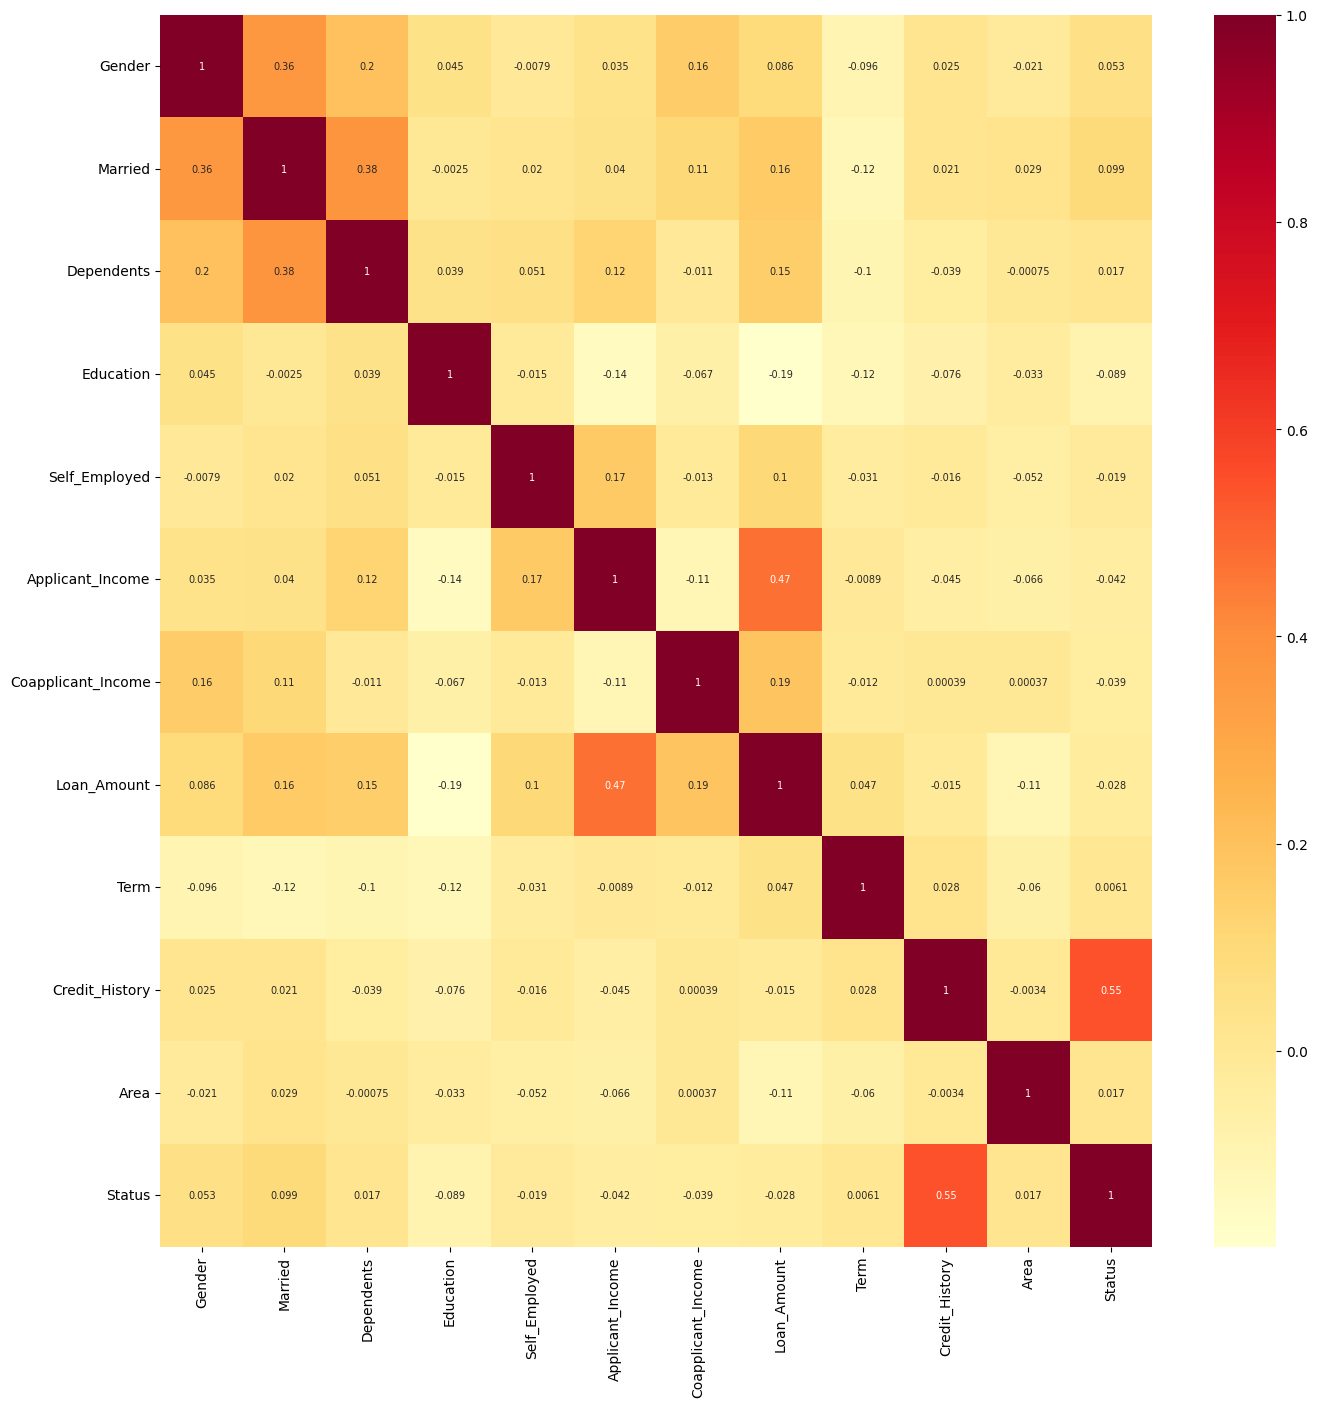

In [382]:
plt.figure(figsize = (16,16)) # figure 사이즈 조절

## 문제 4 ##
# 코드 작성

sns.heatmap(df.corr(),annot=True,cmap='YlOrRd',annot_kws={'size':7}) # 확인결과 Credit_History가 제일 높은 상관관계를 가짐

############

## 데이터 나누기

### **주의 사항**
train_test_split에 random seed를 사용하여 split set을 고정한다.
- 모든 문제에 같은 random seed를 부여할 필요는 없다.

In [383]:
from sklearn.model_selection import train_test_split

X = df.drop('Status', axis=1) # target feature가 Status(대출의 승인 여부)
y = df['Status']
y=y.astype('int')
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9)

print("X_train's shape : ", X_train.shape)
print("y_train's shape : ", y_train.shape)
print("\nX_val's shape : ", X_val.shape)
print("y_val's shape : ", y_val.shape)
print("\nX_test's shape : ", X_test.shape)
print("y_test's shape : ", y_test.shape)

X_train's shape :  (408, 11)
y_train's shape :  (408,)

X_val's shape :  (51, 11)
y_val's shape :  (51,)

X_test's shape :  (52, 11)
y_test's shape :  (52,)


## 문제5: KNN



- Scikit-learn 라이브러리를 이용하여 KNN의 최적의 파라미터를 찾는다.
    - 최근접 이웃을 찾기 위한 거리의 종류로 최소한 두 가지 이상의 거리 척도를 사용한다.
    - K값을 최소 3개 이상 비교한다.
    - 거리 척도, k값에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 k값, y축 정확도)
    - 찾은 최적의 파라미터와 test set 이용하여 test_accuracy 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

In [384]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt


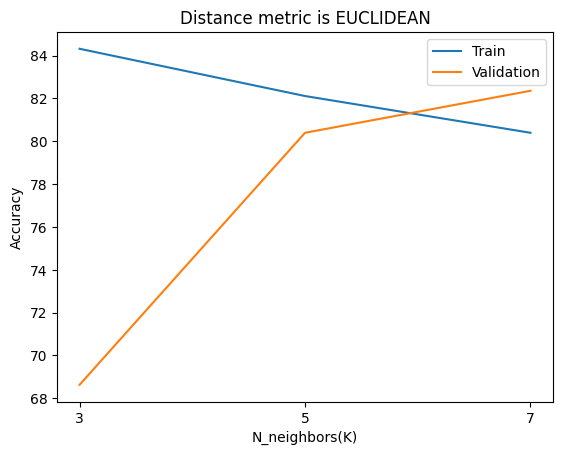

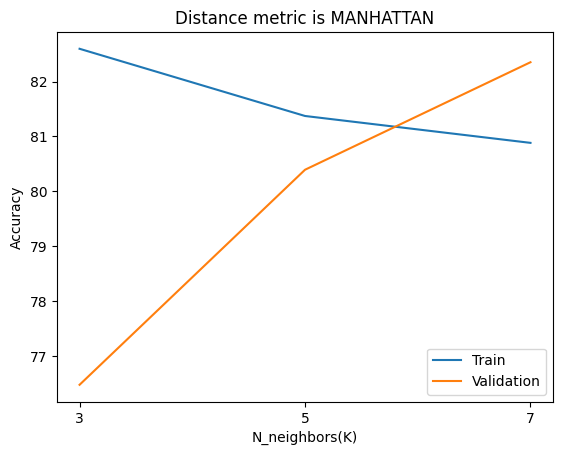

TEST 정확도 : 78.846


In [385]:
### 문제 1 ###
### 코드 작성 ###

K = [3,5,7] # for n_neighbors
distance = ['euclidean','manhattan'] # for distance metric

for metric in distance:

    train_acc_list = list()
    val_acc_list = list()

    for n_neighbors in K: 

        knn = KNeighborsClassifier(n_neighbors=n_neighbors,metric=metric) # 반복문을 돌면서 설정한 파라미터들에 대해서 분류기를 설정
        knn.fit(X_train,y_train) # 학습 데이터로 fit을 진행하고, train, val data에 대해서 각각 predict을 진행한다.
        train_predict = knn.predict(X_train)
        val_predict = knn.predict(X_val)

        train_acc = (np.sum(train_predict==y_train) / len(y_train))*100 # 정확도를 계산한다.
        val_acc = (np.sum(val_predict==y_val) / len(y_val)) * 100 # 정확도를 계산한다.

        train_acc_list.append(train_acc) # plot을 위해 list에 저장
        val_acc_list.append(val_acc) # plot을 위해 list에 저장
    
    # train과 validation에 대해서 실험 셋팅 별 정확도를 비교하기 위해 그래프를 plot 하는 코드
        
    plt.plot(K, train_acc_list,label='Train')
    plt.plot(K, val_acc_list,label='Validation')

    plt.xticks(K)
    plt.xlabel('N_neighbors(K)')
    plt.ylabel('Accuracy')
    plt.title(f"Distance metric is {metric.upper()}")

    plt.legend()
    plt.show()

# 최적의 파라미터를 바탕으로 test data에 대해서 평가 진행
knn = KNeighborsClassifier(n_neighbors=7,metric="manhattan")
knn.fit(X_train,y_train)
test_predict = knn.predict(X_test)
test_acc = (np.sum(test_predict==y_test) / len(y_test))*100

print("TEST 정확도 : {:.3f}".format(test_acc))

################

**설명 작성**  
- 최적의 파라미터: K=7 , distance = 멘하탄거리
- 설명:train정확도와 validation 정확도 차이가 가장 적게 발생하면서 vaidation의 정확도가 가낭 높기 때문에 과적합이 일어나지 않으면서 어느정도 일반성을 가짐

## 문제6 Cross validation with Linear SVM
### 6-1: k-fold
- 수업시간에 배운 **5-fold** 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
    - C 이외의 하이퍼파라미터는 임의로 설정 가능
    - **5-fold CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
    - 파라미터에 따라 K-fold CV를 통해 나온 평균 정확도와 각 fold의 정확도들을 한 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

### 6-2: Leave One Out
- 수업시간에 배운 Leave-One-Out 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 linear SVM 모델의 파라미터 C를 cross-validation을 바탕으로 최적화한다.
  - C 이외의 하이퍼파라미터는 임의로 설정 가능
  - **Leave-One-Out CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
  - 파라미터에 따라 Leave-One-Out CV를 통해 나온 평균 정확도를 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
  - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
  - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

In [400]:
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [401]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1)
Y_train.shape

(459,)

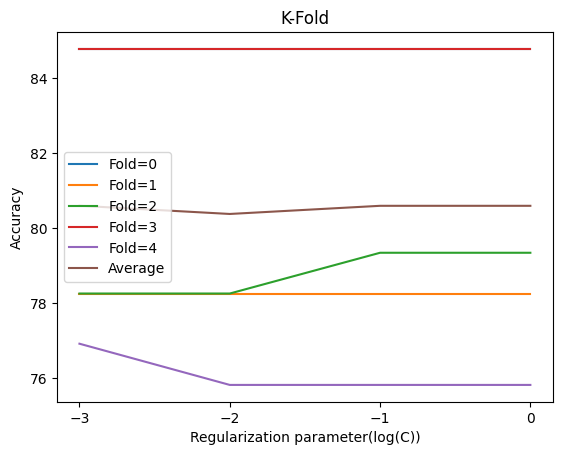

TEST 정확도 : 82.692


In [402]:
## 문제 6-1 ##
# 코드 작성

C = [0.001,0.01,0.1,1.0] # C에 대한 파라미터 후보군
kf = KFold(n_splits = 5, shuffle = True, random_state = 50) # K Fold

avg_val_acc_list = list() # 교차검증 평균값을 위한 리스트

for index, (train_index, valdiation_index) in enumerate(kf.split(X_train)):

    # K-Fold을 이용하여 데이터를 나눔
    x_train, x_val = X_train.iloc[train_index,:], X_train.iloc[valdiation_index,:]
    y_train, y_val = Y_train.iloc[train_index], Y_train.iloc[valdiation_index]

    val_acc_list = list()

    for c in C: # C를 변경하면서 SVM 분류기 실험

        SVM = LinearSVC(C=c,max_iter=10000)
        SVM.fit(x_train,y_train)
        
        val_predict = SVM.predict(x_val)
        val_acc = (np.sum(val_predict==y_val) / len(y_val)) * 100 # 정확도를 계산한다.
        val_acc_list.append(val_acc) # plot을 위해 list에 저장 

    avg_val_acc_list.append(val_acc_list)
    plt.plot(np.log10(C), val_acc_list,label=f'Fold={index}') # x축을 log scale로 변경해서 보기 쉽게 만든다

avg_val_acc_list = np.array(avg_val_acc_list)
avg_val_acc_list = np.mean(avg_val_acc_list,axis=0) # np.mean 함수 활용하여 폴드별 평균 정확도를 계산
plt.plot(np.log10(C), avg_val_acc_list,label=f'Average')

plt.xticks(np.log10(C))
plt.xlabel('Regularization parameter(log(C))')
plt.ylabel('Accuracy')
plt.title(f"K-Fold")

plt.legend()
plt.show()

# 최적의 파라미터를 바탕으로 test data에 대해서 평가 진행
SVM = LinearSVC(C=0.001,max_iter=2000)
SVM.fit(X_train,Y_train)
test_predict = SVM.predict(X_test)
test_acc = (np.sum(test_predict==Y_test) / len(Y_test))*100

print("TEST 정확도 : {:.3f}".format(test_acc))
############

**설명 작성**  
- 최적의 파라미터: C = 0.001
- 설명: 교차 검증의 평균 정확도가 가장 높음

459it [00:47,  9.72it/s]


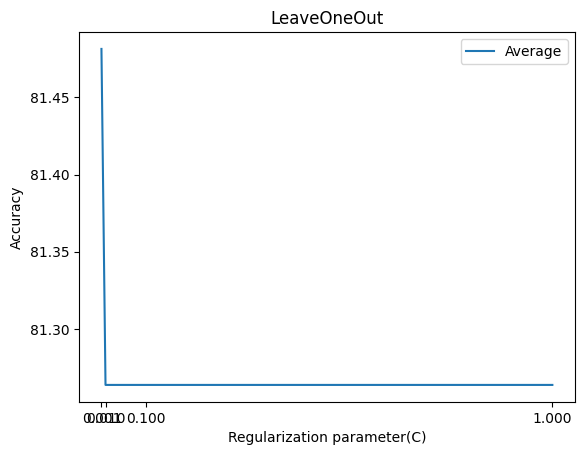

TEST 정확도 : 75.000


In [389]:
## 문제 6-2 ##
# 코드 작성

C = [0.001,0.01,0.1,1.0] # C에 대한 파라미터 후보군
loo = LeaveOneOut() # LeaveOneOut

avg_val_acc_list = list() # 교차검증 평균값을 위한 리스트

for index, (train_index, valdiation_index) in tqdm.tqdm(enumerate(loo.split(X_train))):

    # LeaveOneOut을 이용하여 데이터를 나눔
    x_train, x_val = X_train.iloc[train_index,:], X_train.iloc[valdiation_index,:]
    y_train, y_val = Y_train.iloc[train_index], Y_train.iloc[valdiation_index]

    val_acc_list = list()

    for c in C: # C를 변경하면서 SVM 분류기 실험

        SVM = LinearSVC(C=c,max_iter=10000)
        SVM.fit(x_train,y_train)
        
        val_predict = SVM.predict(x_val)
        val_acc = (np.sum(val_predict==y_val) / len(y_val)) * 100 # 정확도를 계산한다.
        val_acc_list.append(val_acc) # plot을 위해 list에 저장 

    avg_val_acc_list.append(val_acc_list)

avg_val_acc_list = np.array(avg_val_acc_list)
avg_val_acc_list = np.mean(avg_val_acc_list,axis=0) # np.mean 함수 활용하여 폴드별 평균 정확도를 계산
plt.plot(C, avg_val_acc_list,label=f'Average')

plt.xticks(C)
plt.xlabel('Regularization parameter(C)')
plt.ylabel('Accuracy')
plt.title(f"LeaveOneOut")

plt.legend()
plt.show()

# 최적의 파라미터를 바탕으로 test data에 대해서 평가 진행
SVM = LinearSVC(C=0.001,max_iter=2000)
SVM.fit(X_train,Y_train)
test_predict = SVM.predict(X_test)
test_acc = (np.sum(test_predict==Y_test) / len(Y_test))*100

print("TEST 정확도 : {:.3f}".format(test_acc))
############

############

**설명 작성**  
- 최적의 파라미터: C = 0.001
- 설명: 교차 검증의 평균 정확도가 가장 높음

## 문제7 Cross validation with SVM
### 7-1: k-fold
- 문제6-1 코드에서 kernel을 바꾸어 k-fold를 진행하세요
- C는 2로 설정하고 k=5로 설정합니다.

### 7-2: Leave One Out
- 문제6-2 코드에서 kernel을 바꾸어 Leave one out를 진행하세요
- C는 2로 설정합니다.

### 7-3: 데이터의 특성
문제 6의 결과와 7-1, 7-2의 결과를 비교하여 보았을 때 주어진 데이터는 어떤 관계인지 (선형, 비선형)인지 적고, 왜 그런지 그 이유를 서술하세요


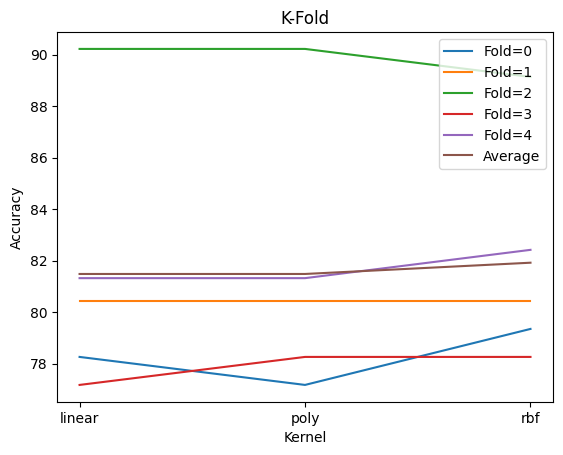

TEST 정확도 : 75.000


In [390]:
## 문제 7-1 ##
# 코드 작성

kernel = ['linear', 'poly', 'rbf'] # kernel에 대한 파라미터 후보군
kernel_x = [1,2,3]
kf = KFold(n_splits = 5, shuffle = True, random_state = 50) # K Fold

avg_val_acc_list = list() # 교차검증 평균값을 위한 리스트

for index, (train_index, valdiation_index) in enumerate(kf.split(X_train)):

    # K-Fold을 이용하여 데이터를 나눔
    x_train, x_val = X_train.iloc[train_index,:], X_train.iloc[valdiation_index,:]
    y_train, y_val = Y_train.iloc[train_index], Y_train.iloc[valdiation_index]

    val_acc_list = list()

    for kernel_ in kernel: # kernel을 변경하면서 SVM 분류기 실험

        SVM = SVC(C=2.0,kernel=kernel_,max_iter=10000)
        SVM.fit(x_train,y_train)
        
        val_predict = SVM.predict(x_val)
        val_acc = (np.sum(val_predict==y_val) / len(y_val)) * 100 # 정확도를 계산한다.
        val_acc_list.append(val_acc) # plot을 위해 list에 저장 

    avg_val_acc_list.append(val_acc_list)
    plt.plot(kernel_x, val_acc_list,label=f'Fold={index}') # x축을 log scale로 변경해서 보기 쉽게 만든다

avg_val_acc_list = np.array(avg_val_acc_list)
avg_val_acc_list = np.mean(avg_val_acc_list,axis=0) # np.mean 함수 활용하여 폴드별 평균 정확도를 계산
plt.plot(kernel_x, avg_val_acc_list,label=f'Average')

plt.xticks(kernel_x, kernel)
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title(f"K-Fold")

plt.legend()
plt.show()

# 최적의 파라미터를 바탕으로 test data에 대해서 평가 진행
SVM = SVC(C=2.0,kernel='linear',max_iter=10000)
SVM.fit(X_train,Y_train)
test_predict = SVM.predict(X_test)
test_acc = (np.sum(test_predict==Y_test) / len(Y_test))*100

print("TEST 정확도 : {:.3f}".format(test_acc))

############

459it [00:19, 23.67it/s]


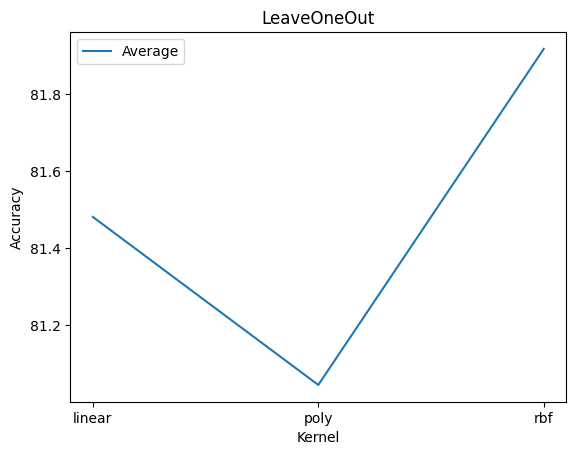

TEST 정확도 : 75.000


In [391]:
## 문제 7-2 ##
# 코드 작성

kernel = ['linear', 'poly', 'rbf'] # kernel에 대한 파라미터 후보군
kernel_x = [1,2,3]
loo = LeaveOneOut() # LeaveOneOut

avg_val_acc_list = list() # 교차검증 평균값을 위한 리스트

for index, (train_index, valdiation_index) in tqdm.tqdm(enumerate(loo.split(X_train))):

    # K-Fold을 이용하여 데이터를 나눔
    x_train, x_val = X_train.iloc[train_index,:], X_train.iloc[valdiation_index,:]
    y_train, y_val = Y_train.iloc[train_index], Y_train.iloc[valdiation_index]

    val_acc_list = list()

    for kernel_ in kernel: # C를 변경하면서 SVM 분류기 실험

        SVM = SVC(C=2.0,kernel=kernel_,max_iter=10000)
        SVM.fit(x_train,y_train)
        
        val_predict = SVM.predict(x_val)
        val_acc = (np.sum(val_predict==y_val) / len(y_val)) * 100 # 정확도를 계산한다.
        val_acc_list.append(val_acc) # plot을 위해 list에 저장 

    avg_val_acc_list.append(val_acc_list)

avg_val_acc_list = np.array(avg_val_acc_list)
avg_val_acc_list = np.mean(avg_val_acc_list,axis=0) # np.mean 함수 활용하여 폴드별 평균 정확도를 계산

plt.plot(kernel_x, avg_val_acc_list,label=f'Average')

plt.xticks(kernel_x, kernel)
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title(f"LeaveOneOut")

plt.legend()
plt.show()

# 최적의 파라미터를 바탕으로 test data에 대해서 평가 진행
SVM = SVC(C=2.0,kernel='linear',max_iter=10000)
SVM.fit(X_train,Y_train)
test_predict = SVM.predict(X_test)
test_acc = (np.sum(test_predict==Y_test) / len(Y_test))*100

print("TEST 정확도 : {:.3f}".format(test_acc))

############

**7-3 설명 작성**  
- 설명:Linear Kernel을 사용했을 때의 성능이 비교적 높은 것을 보아 선형 분리가능한 데이터의 성질을 가지는 것 같다고 볼 수 있음

## 문제 8: Grid search
### 문제 8-1
주어진 param_grid에 대해서 RandomForestClassifier에 GridSearch cross validation(cv=5)을 수행하는 코드를 작성하고 best hyperparameter를 출력하세요.  
* 아래의 주어진 패키지를 사용합니다.



In [392]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [393]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [394]:
## 문제 8-1 ##
## 코드 작성 ##
rf = RandomForestClassifier()
clf = GridSearchCV(rf, param_grid, cv=5, verbose=True)
clf.fit(X_train, Y_train)
############

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             verbose=True)

### 문제 8-2
8-1에서 구한 best parameter를 사용하여 최종적인 RandomForestClassifier를 만든 후 train 데이터로 학습 후, `accuracy_score`를 사용하여 test accuracy를 출력하세요.

In [395]:
from sklearn.metrics import accuracy_score

In [396]:
## 문제 8-2 ##
## 코드 작성 ##
# clf.best_params_ = {'criterion': 'gini','max_depth': 8,'max_features': 'sqrt','n_estimators': 500}

rf = RandomForestClassifier(criterion='gini',max_depth=8,max_features='sqrt',n_estimators=500)
rf.fit(X_train,Y_train)
predict=rf.predict(X_train)

print("Random Forest ACC : {:.3f}".format(accuracy_score(predict,Y_train)*100))
############

Random Forest ACC : 88.889
